# Ejercicio 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def step(x):
    return 1 if x >= 0 else -1


class PerceptronSimple:
    learning_rate = 0.1
    activation = step

    def __init__(self, input_size):
        #self.weights = np.zeros(input_size + 1) # El 1 es por el bias
        self.weights = np.random.random(input_size + 1) # El 1 es por el bias
        
    def predict(self, x):
        x = np.insert(x, 0, 1) # El bias es x_0 * 1.0
        z = np.dot(self.weights, x)
        return step(z)

    def train(self, x, y, epochs=10):
        for _ in range(epochs):
            for xi, target in zip(x, y):
                xi = np.insert(xi, 0, 1)  # add bias input
                prediction = step(np.dot(self.weights, xi))
                self.weights += 2 * self.learning_rate * (target - prediction) * xi


Función lógica "AND"

In [3]:
x = np.array([[-1, 1], [1, -1], [-1, -1], [1, 1]])
y = np.array([-1, -1, -1, 1])

perceptron = PerceptronSimple(input_size=2)
perceptron.train(x, y, epochs=5)

for xi in x:
    print(f"Entrada: {xi}, \tSalida: {perceptron.predict(xi)}")

Entrada: [-1  1], 	Salida: -1
Entrada: [ 1 -1], 	Salida: -1
Entrada: [-1 -1], 	Salida: -1
Entrada: [1 1], 	Salida: 1


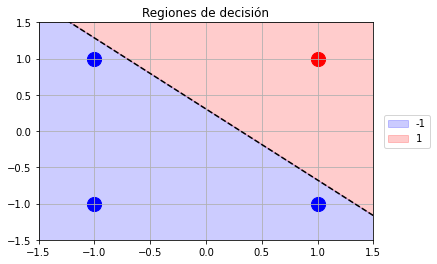

In [4]:
for i in range(4):
    color = "red" if y[i] == 1 else "blue"
    plt.scatter(x[i][0], x[i][1], color=color, s=200)

b, mx, my = perceptron.weights
x_boundary = np.linspace(-2, 2, 2, endpoint=bool)
if mx * my == 0:
    y_boundary = -np.ones_like(x_boundary) * b
else:
    y_boundary = -mx/my * x_boundary - b/my

plt.plot(x_boundary, y_boundary, linestyle="--", color="k")
plt.fill_between(x_boundary, y_boundary, -3, color="blue", alpha=0.2, label="-1")
plt.fill_between(x_boundary, y_boundary, 3, color="red", alpha=0.2, label="1")
plt.legend(bbox_to_anchor=[1.1, 0.5], loc='center')
plt.grid()
plt.title("Regiones de decisión")
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

Función lógica "XOR"

In [9]:
x = np.array([[-1, 1], [1, -1], [-1, -1], [1, 1]])
y = np.array([1, 1, -1, -1])

perceptron = PerceptronSimple(input_size=2)
perceptron.train(x, y, epochs=5)

for xi in x:
    print(f"Entrada: {xi}, \tSalida: {perceptron.predict(xi)}")

Entrada: [-1  1], 	Salida: -1
Entrada: [ 1 -1], 	Salida: 1
Entrada: [-1 -1], 	Salida: 1
Entrada: [1 1], 	Salida: -1


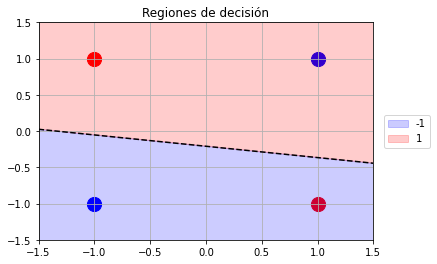

In [10]:
for i in range(4):
    color = "red" if y[i] == 1 else "blue"
    plt.scatter(x[i][0], x[i][1], color=color, s=200)

b, mx, my = perceptron.weights
x_boundary = np.linspace(-2, 2, 2, endpoint=bool)

if mx * my == 0:
    y_boundary = -np.ones_like(x_boundary) * b
else:
    y_boundary = -mx/my * x_boundary - b/my

plt.plot(x_boundary, y_boundary, linestyle="--", color="k")
plt.fill_between(x_boundary, y_boundary, -3, color="blue", alpha=0.2, label="-1")
plt.fill_between(x_boundary, y_boundary, 3, color="red", alpha=0.2, label="1")
plt.legend(bbox_to_anchor=[1.1, 0.5], loc='center')
plt.grid()
plt.title("Regiones de decisión")
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

El perceptron no puede separar correctamente la función lógica "XOR" porque el espacio de caracteristicas no es lineal. Se deberián recurrir a más fronteras para separar el problema.

Eso se puede hacer componiendo el problema con dos perceptrones y una función "AND" adicional.

In [7]:
x = np.array([[-1, 1], [1, -1], [-1, -1], [1, 1]])
y1 = np.array([-1, -1, -1, 1])
y2 = np.array([-1, -1, 1, -1])

perceptron1 = PerceptronSimple(input_size=2)
perceptron1.train(x, y1, epochs=5)

perceptron2 = PerceptronSimple(input_size=2)
perceptron2.train(x, y2, epochs=5)

for xi in x:
    print(f"Entrada: {xi}, \tSalida p1: {perceptron1.predict(xi)}")
    print(f"\t\t\tSalida p2: {perceptron2.predict(xi)}")
    print("\t"*3 + "-"*10)
    print("\t"*3 + "Salida:", perceptron2.predict(xi) * perceptron1.predict(xi))
    print()
    

Entrada: [-1  1], 	Salida p1: -1
			Salida p2: -1
			----------
			Salida: 1

Entrada: [ 1 -1], 	Salida p1: -1
			Salida p2: -1
			----------
			Salida: 1

Entrada: [-1 -1], 	Salida p1: -1
			Salida p2: 1
			----------
			Salida: -1

Entrada: [1 1], 	Salida p1: 1
			Salida p2: -1
			----------
			Salida: -1



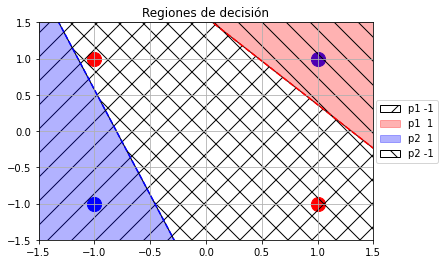

In [8]:
for i in range(4):
    color = "red" if y[i] == 1 else "blue"
    plt.scatter(x[i][0], x[i][1], color=color, s=200)

b, mx, my = perceptron1.weights
x_boundary1 = np.linspace(-2, 2, 2, endpoint=bool)
if mx * my == 0:
    y_boundary1 = -np.ones_like(x_boundary1) * b
else:
    y_boundary1 = -mx/my * x_boundary1 - b/my
plt.plot(x_boundary1, y_boundary1, linestyle="--", color="r")
plt.fill_between(x_boundary1, y_boundary1, -3, color="none", edgecolor="k", label="p1 -1", hatch="/")
plt.fill_between(x_boundary1, y_boundary1, 3, color="red", alpha=0.3, label="p1  1")

b, mx, my = perceptron2.weights
x_boundary2 = np.linspace(-2, 2, 2, endpoint=bool)
if mx * my == 0:
    y_boundary2 = -np.ones_like(x_boundary2) * b
else:
    y_boundary2 = -mx/my * x_boundary2 - b/my
plt.plot(x_boundary2, y_boundary2, linestyle="--", color="b")
plt.fill_between(x_boundary2, y_boundary2, -3, color="blue", alpha=0.3, label="p2  1")
plt.fill_between(x_boundary2, y_boundary2, 3, color="none", edgecolor="k", label="p2 -1", hatch="\\")


plt.legend(bbox_to_anchor=[1.1, 0.5], loc='center')
plt.grid()
plt.title("Regiones de decisión")
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()